#Recuperação de imagens usando filtros de Log-Gabor

Matheus de Almeida Mazieiro - 812050

Pedro Guilherme Torres das Neves - 812110

In [1]:
import numpy as np

# Importa a biblioteca OpenCV
import cv2

import matplotlib.pyplot as plt

In [2]:
def correlation(img, w):
    numRows, numCols = img.shape
    fNumRows, fNumCols = w.shape   # fNumRows=a+1 e fNumCols=b+1 (a e b da fórmula acima)

    halfRSize = fNumRows//2        # O operador // retorna a parte inteira da divisão
    halfCSize = fNumCols//2

    imgPadded = np.zeros((numRows+fNumRows-1, numCols+fNumCols-1), dtype=img.dtype)
    for row in range(numRows):
        for col in range(numCols):
            imgPadded[row+halfRSize, col+halfCSize] = img[row, col]

    img_filtered = np.zeros((numRows, numCols))
    for row in range(numRows):
        for col in range(numCols):
            sum_region = 0
            for s in range(fNumRows):
                for t in range(fNumCols):

                    sum_region += w[s, t]*imgPadded[row+s, col+t]
            img_filtered[row, col] = sum_region

    return img_filtered

#
# Operação de convolução
#
def convolution(img, w):
    # Inverte o filtro
    w_inv = w[::-1, ::-1]

    img_filtered = correlation(img, w_inv)

    return img_filtered

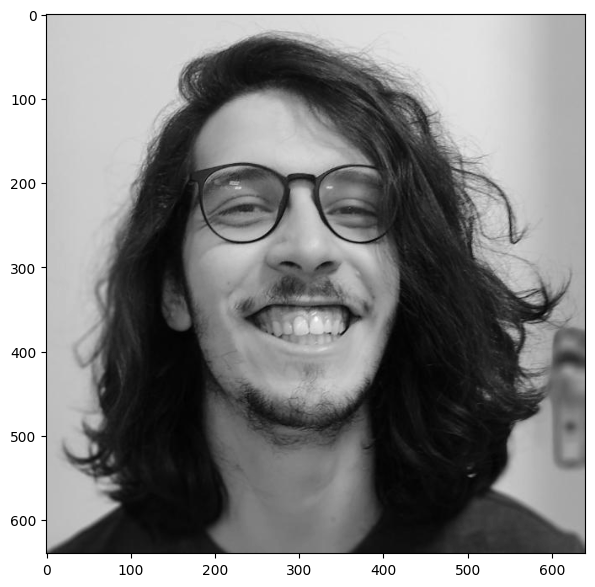

In [10]:
img_path = 'C:/Users/mathe/OneDrive/Área de Trabalho/Stuff/UFSCAR/PDI/Trabalho/'
img_filename = 'Produtos_MatheusMazieiro.tiff'

combined_path = img_filename #img_path + img_filename

# Lê imagem e automaticamente converte para 1 canal de cinza
img = cv2.imread(combined_path, cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=[7,7])
plt.imshow(img, 'gray')

In [11]:
def gabor(sigma, theta, Lambda, psi, gamma):
    """Gabor feature extraction."""
    sigma_x = sigma
    sigma_y = float(sigma) / gamma

    # Bounding box
    nstds = 3  # Number of standard deviation sigma
    xmax = max(
        abs(nstds * sigma_x * np.cos(theta)), abs(nstds * sigma_y * np.sin(theta))
    )
    xmax = np.ceil(max(1, xmax))
    ymax = max(
        abs(nstds * sigma_x * np.sin(theta)), abs(nstds * sigma_y * np.cos(theta))
    )
    ymax = np.ceil(max(1, ymax))
    xmin = -xmax
    ymin = -ymax
    (y, x) = np.meshgrid(np.arange(ymin, ymax + 1), np.arange(xmin, xmax + 1))

    # Rotation
    x_theta = x * np.cos(theta) + y * np.sin(theta)
    y_theta = -x * np.sin(theta) + y * np.cos(theta)

    gb = np.exp(
        -0.5 * (x_theta**2 / sigma_x**2 + y_theta**2 / sigma_y**2)
    ) * np.cos(2 * np.pi / Lambda * x_theta + psi)
    return gb

In [12]:
sigma = 5.0
theta = np.pi / 4  # 45 graus
Lambda = 10.0
psi = 0
gamma = 0.5

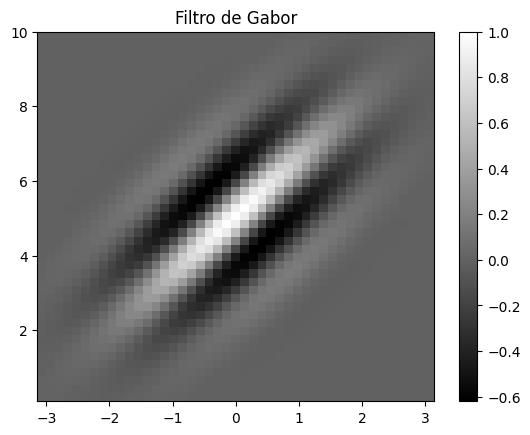

In [13]:
w = gabor(sigma, theta, Lambda, psi, gamma)
plt.imshow(w, extent=[-np.pi, np.pi, 0.1, 10], aspect='auto', cmap='gray')
plt.colorbar()
plt.title("Filtro de Gabor")
plt.show()

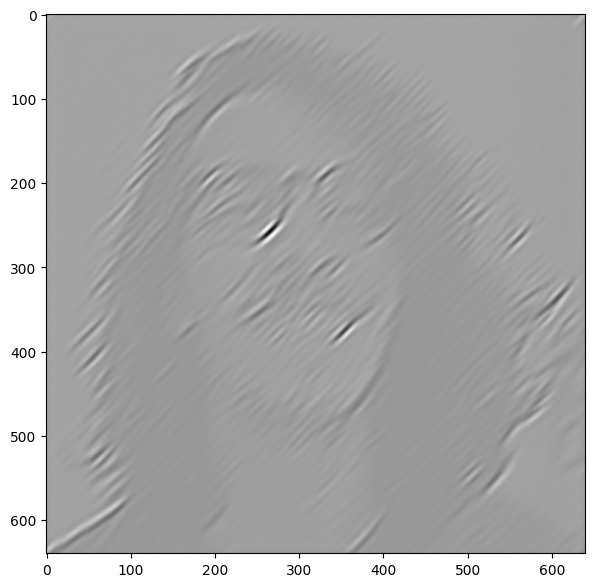

In [14]:
img_gabor = convolution(img, w)
plt.figure(figsize=[7,7])
plt.imshow(img_gabor, 'gray')

In [15]:
lgFilterSize = 5

# Gerar coordenadas polares
ro = np.linspace(0.1, 10, lgFilterSize)
theta = np.linspace(-np.pi, np.pi, lgFilterSize)
ro, theta = np.meshgrid(ro, theta)

# Parâmetros do filtro de Gabor log-polar
u0 = 1.0
alphaRo = 2.0
alphaTheta = 1.0
theta0 = 0

In [16]:
def logGabor(ro, theta, u0, alphaRo, alphaTheta, theta0):
    """Log-Gabor feature extraction."""
    loggb = np.exp(
        -0.5 * ((np.log(ro/u0)/np.log(alphaRo/u0))**2)
    ) * np.exp(
        -0.5 * ((theta - theta0)/alphaTheta)
    )
    return loggb

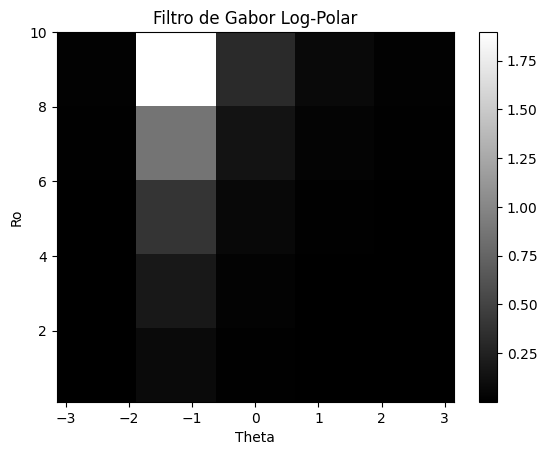

In [17]:
w = logGabor(ro, theta, u0, alphaRo, alphaTheta, theta0)

plt.imshow(w, extent=[-np.pi, np.pi, 0.1, 10], aspect='auto', cmap='gray')
plt.colorbar()
plt.title("Filtro de Gabor Log-Polar")
plt.xlabel("Theta")
plt.ylabel("Ro")
plt.show()

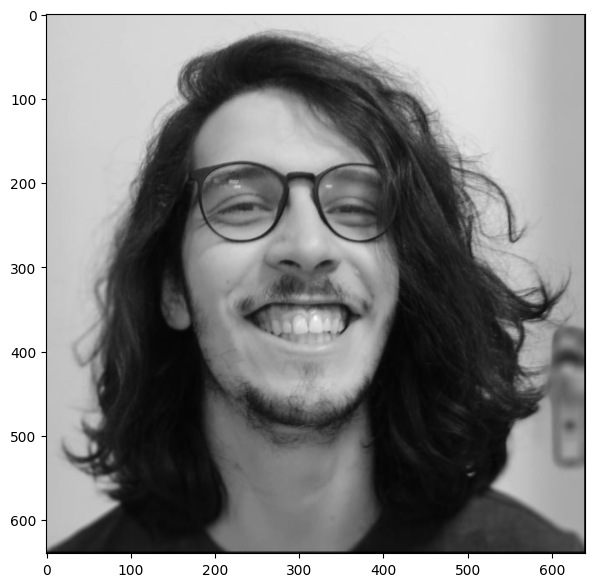

In [18]:
img_logGabor = convolution(img, w)
plt.figure(figsize=[7,7])
plt.imshow(img_logGabor, 'gray')

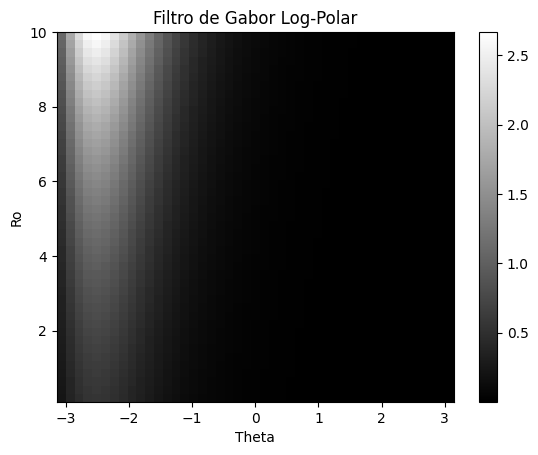

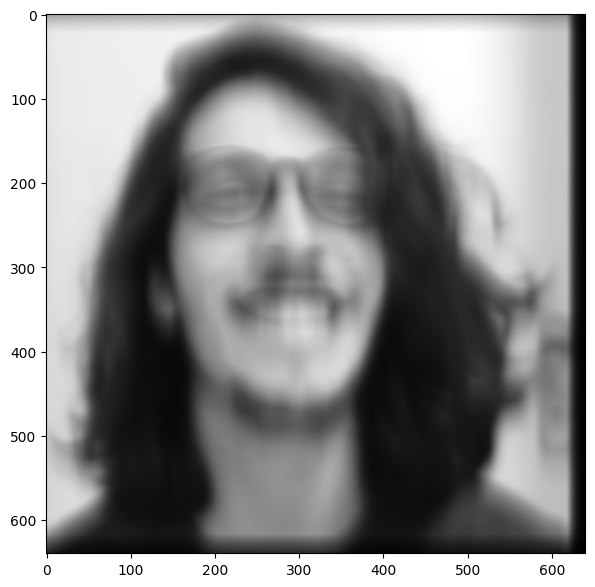

In [20]:
lgFilterSize = 45

# Gerar coordenadas polares
ro = np.linspace(1, 10, lgFilterSize)
theta = np.linspace(-np.pi, np.pi, lgFilterSize)
ro, theta = np.meshgrid(ro, theta)

# Parâmetros do filtro de Gabor log-polar
u0 = 1.8
alphaRo = 2.8
alphaTheta = 2
theta0 = np.pi/4
w = logGabor(ro, theta, u0, alphaRo, alphaTheta, theta0)

plt.imshow(w, extent=[-np.pi, np.pi, 0.1, 10], aspect='auto', cmap='gray')
plt.colorbar()
plt.title("Filtro de Gabor Log-Polar")
plt.xlabel("Theta")
plt.ylabel("Ro")
plt.show()

img_logGabor = convolution(img, w)
plt.figure(figsize=[7,7])
plt.imshow(img_logGabor, 'gray')

Text(0.5, 1.0, 'Log Gabor')

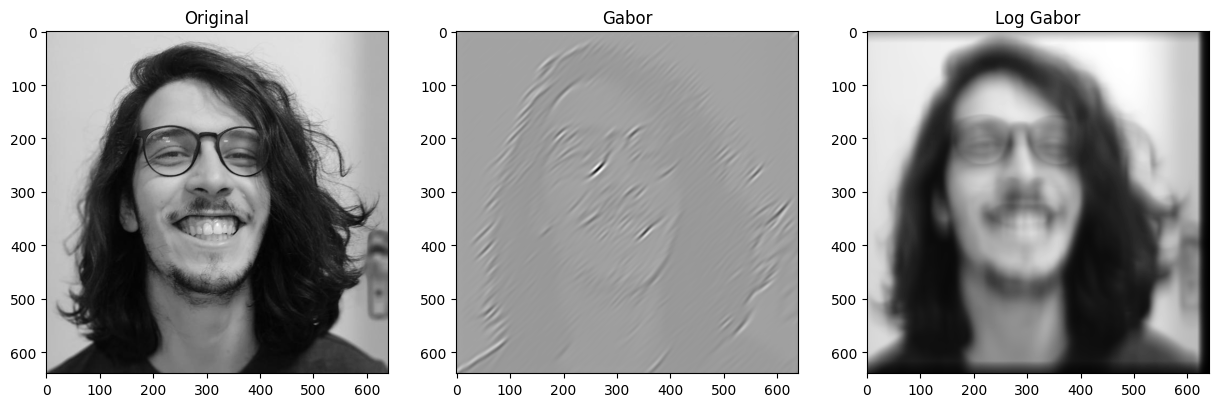

In [21]:
plt.figure(figsize=[15,15])
plt.subplot(1,3,1)
plt.imshow(img, 'gray')
plt.title('Original')
plt.subplot(1,3,2)
plt.imshow(img_gabor, 'gray')
plt.title('Gabor')
plt.subplot(1,3,3)
plt.imshow(img_logGabor, 'gray')
plt.title('Log Gabor')